In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 100
color = sns.color_palette()
sns.set(style="white")

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

In [21]:
carac = pd.read_csv("Caracteristics_done.csv", low_memory=False, index_col="Num_Acc")

In [22]:
new_carac = carac.drop(["Unnamed: 0"], axis=1)

In [23]:
for col in new_carac.columns:
    new_carac = pd.concat([new_carac, pd.get_dummies(new_carac[col], prefix=col, prefix_sep='_')], axis=1)
    new_carac.drop(col, axis=1, inplace=True)

cluster_carac = new_carac.drop(columns=["an_0", "hrmn_0", "lum_0", "agg_1", "agg_6", "int_0", "atm_0", "col_0", "sun_sat_hol_holminus1_0", "friday_0"], axis=1)

In [24]:
cluster_carac.head()

,an_1,hrmn_1,hrmn_2,lum_1,agg_2,int_1,atm_1,col_1,col_2,sun_sat_hol_holminus1_1,friday_1
Num_Acc,,,,,,,,,,,
201600000001,1,0,0,1,1,1,0,0,0,0,1
201600000002,1,1,0,1,1,0,1,1,0,0,1
201600000003,1,1,0,1,0,1,1,1,0,1,1
201600000004,1,1,0,0,1,1,0,0,0,1,1
201600000005,1,0,0,1,1,0,1,0,0,0,0


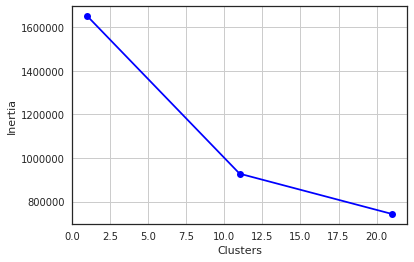

In [25]:
from sklearn.cluster import KMeans

# Range de valores de clusters que vamos testar
k = range(1,31,10)

# Lista de inércias
inertias = []

# Para cada valor de k, ache a inércia
for i in k:
    # crie a instância
    kmeans = KMeans(n_clusters=i, n_jobs=-1)

    # Treine o modelo
    model = kmeans.fit(cluster_carac)

    # Ache a inercia dos clusters
    inertias.append(model.inertia_)
    
plt.plot(k, inertias, '-ob')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [26]:
kmeans = KMeans(n_clusters=10, n_jobs=-1)
labels = kmeans.fit_predict(cluster_carac)

In [27]:
label, count = np.unique(labels, return_counts=True)
for l, c in zip(label,count):
    print('Cluster {}: {}'.format(l,c))

Cluster 0: 73670
Cluster 1: 109947
Cluster 2: 91547
Cluster 3: 103746
Cluster 4: 60168
Cluster 5: 90097
Cluster 6: 44007
Cluster 7: 97863
Cluster 8: 92164
Cluster 9: 76776


In [28]:
clusters_n = kmeans.labels_.astype(np.int)

In [29]:
clusters_n

array([1, 1, 7, ..., 5, 5, 4])

In [19]:
new_carac["cluster"] = clusters_n
new_carac.groupby("cluster").mean()

,an_0,an_1,hrmn_0,hrmn_1,hrmn_2,lum_0,lum_1,agg_1,agg_2,agg_6,int_0,int_1,atm_0,atm_1,col_0,col_1,col_2,sun_sat_hol_holminus1_0,sun_sat_hol_holminus1_1,friday_0,friday_1
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.000000,0.970650,0.000000,0.029350,0.148648,0.851352,0.081844,0.918156,0.000000,1.000000,0.000000,0.173476,0.826524,0.713487,0.238235,0.048278,0.771722,0.228278,0.171908,0.828092
1,0.785511,0.214489,0.862576,0.115268,0.022155,0.116450,0.883550,0.584333,0.415667,0.000000,0.000498,0.999502,0.184565,0.815435,0.817388,0.000000,0.182612,1.000000,0.000000,0.227258,0.772742
2,0.000000,1.000000,0.810301,0.170755,0.018944,0.143623,0.856377,0.210022,0.789978,0.000000,0.239249,0.760751,0.189053,0.810947,0.000000,1.000000,0.000000,1.000000,0.000000,0.224007,0.775993
3,0.648829,0.351171,0.014417,0.985583,0.000000,1.000000,0.000000,0.244289,0.755711,0.000000,0.293316,0.706684,0.329144,0.670856,0.579395,0.350282,0.070323,0.780805,0.219195,0.178767,0.821233
4,1.000000,0.000000,0.956472,0.018203,0.025325,0.246717,0.753283,0.320893,0.679014,0.000094,0.008119,0.991881,0.192076,0.807924,0.000000,1.000000,0.000000,0.660644,0.339356,0.153517,0.846483
5,0.000000,1.000000,0.783579,0.195302,0.021119,0.092486,0.907514,0.071836,0.928164,0.000000,0.474462,0.525538,0.162334,0.837666,0.892567,0.000000,0.107433,0.999889,0.000111,0.217828,0.782172
6,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.081323,0.918677,0.000000,0.353065,0.646935,0.105863,0.894137,0.591631,0.357182,0.051187,0.785443,0.214557,0.176396,0.823604
7,0.644640,0.355360,0.000000,0.000000,1.000000,1.000000,0.000000,0.302871,0.697129,0.000000,0.316496,0.683504,0.214037,0.785963,0.541847,0.338193,0.119960,0.668464,0.331536,0.192949,0.807051
8,0.925806,0.074194,0.806427,0.153062,0.040511,0.265446,0.734554,0.622261,0.377739,0.000000,0.066426,0.933574,0.170996,0.829004,0.656749,0.000000,0.343251,0.000000,1.000000,0.017327,0.982673


In [17]:
new_carac.head()

,an_0,an_1,hrmn_0,hrmn_1,hrmn_2,lum_0,lum_1,agg_1,agg_2,agg_6,int_0,int_1,atm_0,atm_1,col_0,col_1,col_2,sun_sat_hol_holminus1_0,sun_sat_hol_holminus1_1,friday_0,friday_1,cluster
Num_Acc,,,,,,,,,,,,,,,,,,,,,,
201600000001,0,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,5
201600000002,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,2
201600000003,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,1,9
201600000004,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,3
201600000005,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,5


In [18]:
cluster_carac["cluster_carac"] = clusters_n
cluster_carac.head()

,an_1,hrmn_1,hrmn_2,lum_1,agg_2,int_1,atm_1,col_1,col_2,sun_sat_hol_holminus1_1,friday_1,cluster_carac
Num_Acc,,,,,,,,,,,,
201600000001,1,0,0,1,1,1,0,0,0,0,1,5
201600000002,1,1,0,1,1,0,1,1,0,0,1,2
201600000003,1,1,0,1,0,1,1,1,0,1,1,9
201600000004,1,1,0,0,1,1,0,0,0,1,1,3
201600000005,1,0,0,1,1,0,1,0,0,0,0,5


In [18]:
cluster_carac.to_csv("caracteristics_with_clusters.csv", sep=',')